In [223]:
import cv2

import numpy as np
import requests
from matplotlib import pyplot as plt

%matplotlib inline

In [224]:
model_url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
response = requests.get(model_url)
with open('../resources/model_data/haarcascade_frontalface_default.xml', 'wb') as f:
    f.write(response.content)

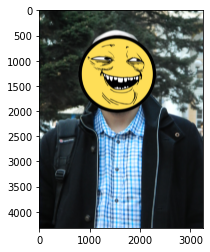

In [225]:
# load the photography
pixels = cv2.cvtColor(cv2.imread('../resources/input_images/1.jpg'), cv2.COLOR_BGR2RGBA)
# load the yobaface
yoba = cv2.cvtColor(cv2.imread('../resources/input_images/yoba.png', cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2RGBA)
# load the pre-trained model
classifier = cv2.CascadeClassifier('../resources/model_data/haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels, scaleFactor=2.0)
# print bounding box for each detected face
for box in bboxes:
  # extract
  x, y, width, height = box
  x2, y2 = x + width, y + height
  # add yobaface instead original faces
  yo = cv2.resize(yoba, dsize=(width, height), interpolation=cv2.INTER_AREA)
  alpha_s = yo[:, :, 3] / 255.0
  alpha_l = 1.0 - alpha_s
  for c in range(0, 4):
    pixels[y:y2, x:x2, c] = (alpha_s * yo[:, :, c] + alpha_l * pixels[y:y2, x:x2, c])
  # pixels[y:y2,x:x2] = yo
# show the result
plt.imshow(pixels, cmap = None, interpolation = 'bicubic')
plt.show()